# 4.10 Coding Etiquette & Excel Reporting

## Instacart Basket Analysis

### by Fardil Bhugaloo

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Q1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
path = r"C:\Users\fardi\OneDrive\Desktop\CF\Data Immersion\Python Fundamentals for Data Analysts\06-09-2021 Instacart Basket Analysis"

In [3]:
# Load complete dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all_new.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,family_name,gender,state,age,number_of_dependents,family_status,income,region,exclusion_flag
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,3,married,40423,Region 3,high_activity_customers
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,3,married,40423,Region 3,high_activity_customers
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,3,married,40423,Region 3,high_activity_customers
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,3,married,40423,Region 3,high_activity_customers
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,3,married,40423,Region 3,high_activity_customers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24414877 entries, 4 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_price              float64
 20  spender_flag            object 
 21  median_order            float

In [6]:
#check for NaN values
df.isna().sum()

order_id                     0
user_id                      0
order_number                 0
orders_day_of_week           0
order_hour_of_day            0
days_since_prior_order       0
product_id                   0
add_to_cart_order            0
reordered                    0
product_name                 0
aisle_id                     0
department_id                0
prices                    3711
price_range_loc              0
busiest_day                  0
busiest_days                 0
busiest_period_of_day        0
max_order                    0
loyalty_flag                 0
mean_price                   0
spender_flag                 0
median_order                 0
frequency_flag               0
family_name                  0
gender                       0
state                        0
age                          0
number_of_dependents         0
family_status                0
income                       0
region                       0
exclusion_flag               0
dtype: i

In [7]:
# dropping missing values
df.dropna(subset = ['prices'], inplace = True)

In [8]:
df.isna().sum()

order_id                  0
user_id                   0
order_number              0
orders_day_of_week        0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
prices                    0
price_range_loc           0
busiest_day               0
busiest_days              0
busiest_period_of_day     0
max_order                 0
loyalty_flag              0
mean_price                0
spender_flag              0
median_order              0
frequency_flag            0
family_name               0
gender                    0
state                     0
age                       0
number_of_dependents      0
family_status             0
income                    0
region                    0
exclusion_flag            0
dtype: int64

## Q2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The dataset contains sensitive data; personal details of customers like their names, these data are considered personally identifiable information (PII). Extra care should be given to these types of data from storing to sharing. As such, the first names and surname columns would dropped.


In [9]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'median_order', 'frequency_flag',
       'family_name', 'gender', 'state', 'age', 'number_of_dependents',
       'family_status', 'income', 'region', 'exclusion_flag'],
      dtype='object')

In [10]:
df.drop(columns = ['family_name'], inplace = True)

## Q3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [11]:
df['state'].value_counts()

Pennsylvania            509414
California              503795
Rhode Island            499198
Georgia                 499161
Arizona                 495906
New Mexico              495783
Oklahoma                495047
North Carolina          494001
Minnesota               491025
Alaska                  490775
Massachusetts           489489
Wyoming                 487032
Virginia                485221
Texas                   484395
Missouri                484300
Colorado                483936
Maine                   482167
Alabama                 480826
North Dakota            480814
Delaware                480479
South Carolina          480322
Nevada                  480186
Kansas                  480002
Washington              479353
Louisiana               479332
New York                478701
Oregon                  478601
Arkansas                477291
Montana                 476900
Hawaii                  475777
South Dakota            475760
Illinois                475106
Mississi

In [12]:
# Assigning region to each state
region = []

for state in df['state']:
    if (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state == 'New Jersey'):
        region.append('Northeast')
    elif (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Kansas') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri'):
        region.append('Midwest')
    elif (state == 'Delaware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    elif (state == 'Idaho') or (state == 'Montana') or (state == 'Wyoming') or (state == 'Nevada') or (state == 'Utah') or (state == 'Colorado') or (state == 'Arizona') or (state == 'New Mexico') or (state == 'Alaska') or (state == 'Washington') or (state == 'Oregon') or (state == 'California') or (state == 'Hawaii'):
        region.append('West')
    else:
        region.append('Stateless')

In [13]:
df['Region'] = region

In [14]:
df['Region'].value_counts()

South        8127783
West         6257904
Midwest      5710796
Northeast    4314683
Name: Region, dtype: int64

#### Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [15]:
# Crossing the varibale region and spender_flag to see if there is spending habit
crosstab_region_spend = pd.crosstab(df['Region'], df['spender_flag'], dropna = False)

In [16]:
crosstab_region_spend

spender_flag,High spender,Low spender
Region,,
Midwest,118248,5592548
Northeast,82029,4232654
South,157899,7969884
West,120826,6137078


In [17]:
crosstab_region_spend.to_clipboard()

## Q4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
df.loc[df['order_number'] < 5, 'exclusion_flag'] = 'low_activity_customers'

In [19]:
df.loc[df['order_number'] >= 5, 'exclusion_flag'] = 'high_activity_customers'

In [20]:
df['exclusion_flag'].value_counts(dropna=False)

high_activity_customers    24411166
Name: exclusion_flag, dtype: int64

In [21]:
# create new variable for low activity customers
low_activity_cust_df = df[df['exclusion_flag'] == 'low_activity_customers']

In [22]:
low_activity_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,number_of_dependents,family_status,income,region,exclusion_flag,Region


In [23]:
# Export low_activity customers dataset
low_activity_cust_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [24]:
#EXCLUDING THE CUSTOMERS WITH MAX ORDERS < 5
df_cleaned =df[df['order_number'] >= 5]

In [25]:
df_cleaned['exclusion_flag'].value_counts(dropna=False)

high_activity_customers    24411166
Name: exclusion_flag, dtype: int64

In [26]:
df_cleaned.shape

(24411166, 32)

In [27]:
df_cleaned.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'median_order', 'frequency_flag',
       'gender', 'state', 'age', 'number_of_dependents', 'family_status',
       'income', 'region', 'exclusion_flag', 'Region'],
      dtype='object')

## Q5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [28]:
# region/department_id
xtb_region_dept = pd.crosstab(df_cleaned['department_id'], df_cleaned['Region'], dropna = False)

In [29]:
# department_id/family_status
xtb_dept_family_stat = pd.crosstab(df_cleaned['department_id'], df_cleaned['family_status'], dropna = False)

In [30]:
# department_id/loyalty_flag
xtb_dept_loyalty = pd.crosstab(df_cleaned['department_id'], df_cleaned['loyalty_flag'], dropna = False)

In [31]:
# department_id/frequency
xtb_dept_frequency = pd.crosstab(df_cleaned['department_id'], df_cleaned['frequency_flag'], dropna = False)

In [32]:
#Creating a crosstab to find the relation between family_status and tpye of spenders
xtb_family_status_spenders = pd.crosstab(df_cleaned['family_status'], df_cleaned['spender_flag'], dropna = False)

In [33]:
# family_status/frequency_flag
xtb_family_status_frequency = pd.crosstab(df_cleaned['family_status'], df_cleaned['frequency_flag'], dropna = False)

In [34]:
# family_status/loyalty_flag
xtb_family_status_loyalty = pd.crosstab(df_cleaned['family_status'], df_cleaned['loyalty_flag'], dropna = False)

In [35]:
# family_status/region
xtb_family_status_region  = pd.crosstab(df_cleaned['family_status'], df_cleaned['Region'], dropna = False)

In [36]:
# family_status/dependent
xtb_family_status_dependent  = pd.crosstab(df_cleaned['family_status'], df_cleaned['number_of_dependents'], dropna = False)

In [37]:
# Region/loyalty_flag
xtb_region_loyalty = pd.crosstab(df_cleaned['Region'], df_cleaned['loyalty_flag'], dropna = False)

In [38]:
# Region/frequency_flag
xtb_region_frequency_flag = pd.crosstab(df_cleaned['Region'], df_cleaned['frequency_flag'], dropna = False)

In [39]:
# Region/spender_flag
xtb_region_spender_flag = pd.crosstab(df_cleaned['Region'], df_cleaned['spender_flag'], dropna = False)

In [40]:
#Creating a crosstab to find the relation between Department ID and Region
xtb_dep_id_region = pd.crosstab(df_cleaned['department_id'], df_cleaned['Region'], dropna = False)
xtb_dep_id_region

Region,Midwest,Northeast,South,West
department_id,,,,
1,381094,283259,545809,417452
2,6284,4932,9200,6750
3,205374,157635,292772,227549
4,1695851,1269360,2409221,1852659
5,25567,18534,36253,27618
6,46607,34491,65417,51385
7,472243,367868,680594,515742
8,16481,14080,23012,18538
9,148529,110708,210680,163808


## Q6. Create an appropriate visualization to show the distribution of profiles.

<AxesSubplot:xlabel='Region'>

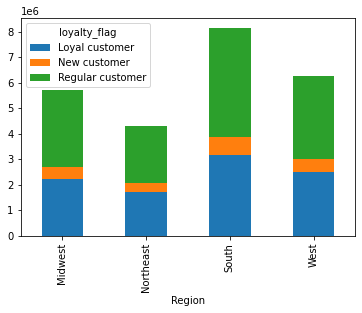

In [41]:
#charting the relation between Regions and loyalty_flag
xtb_region_loyalty.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='department_id'>

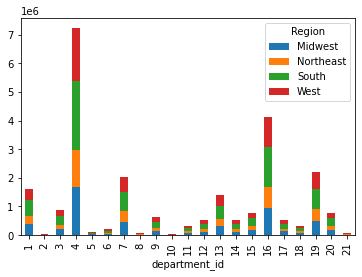

In [42]:
#charting the relation between Regions and department_id
xtb_dep_id_region.plot(kind='bar', stacked=True)

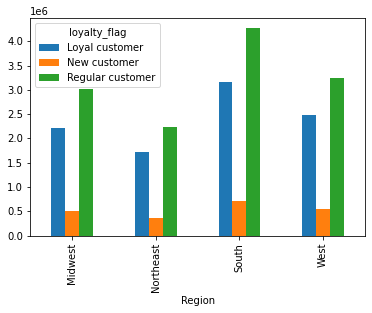

In [43]:
bar_loyalty_region = xtb_region_loyalty.plot(kind = 'bar', stacked = False, width = 0.5)

AttributeError: 'DataFrame' object has no attribute 'set_xlabel'

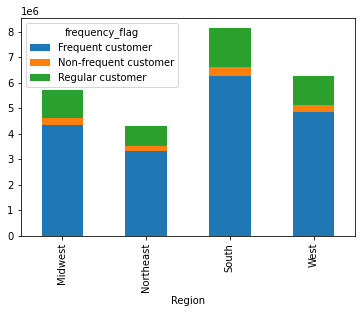

In [113]:
#charting the relation between Regions and frequency_flag
xtb_region_frequency_flag.plot(kind='bar', stacked=True)
xtb_region_frequency_flag.set_xlabel("Region")
xtb_region_frequency_flag.set_ylabel("Cumulative orders in millions")
xtb_region_frequency_flag.set_title("Cumulative Orders per Region per Frequency flag ")



<AxesSubplot:title={'center':'Cumulative Orders per Region per Frequency flag'}, xlabel='Region', ylabel='Cumulative orders in millions'>

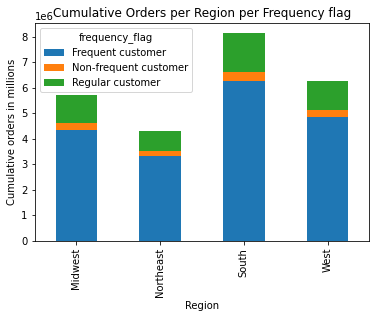

In [127]:
#charting the relation between Regions and frequency_flag
xtb_region_frequency_flag.plot(kind='bar', stacked=True, title= "Cumulative Orders per Region per Frequency flag", ylabel="Cumulative orders in millions", xlabel= "Region")
# plt.set_xlabel("Region")
# plt.set_ylabel("Cumulative orders in millions")
# plt.set_title("Cumulative Orders per Region per Frequency flag ")



<AxesSubplot:xlabel='Region'>

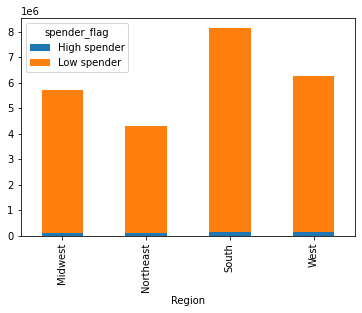

In [45]:
#charting the relation between Regions and spender_flag
xtb_region_spender_flag.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='family_status'>

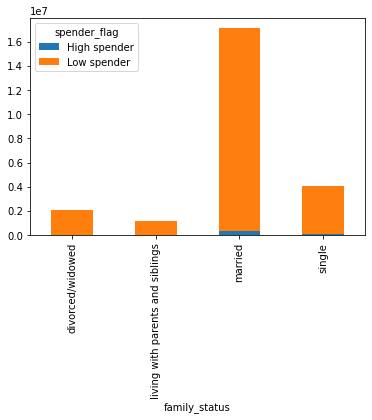

In [46]:
#charting the relation between family status and spender_flag
xtb_family_status_spenders.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='family_status'>

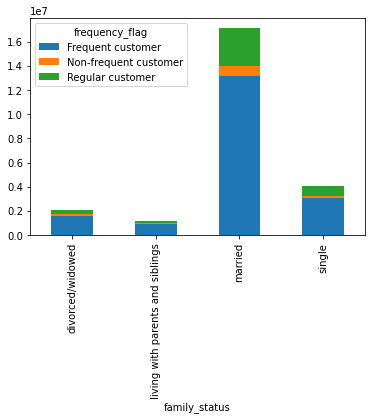

In [47]:
#charting the relation between family status and frequency_flag
xtb_family_status_frequency.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='family_status'>

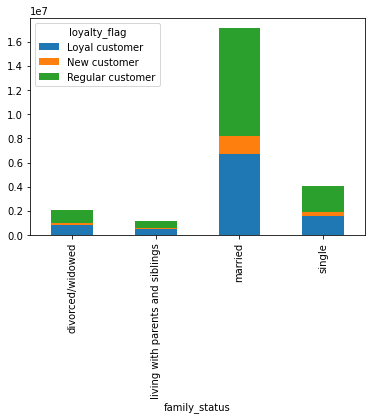

In [48]:
#charting the relation between family status and loyalty_flag
xtb_family_status_loyalty.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='family_status'>

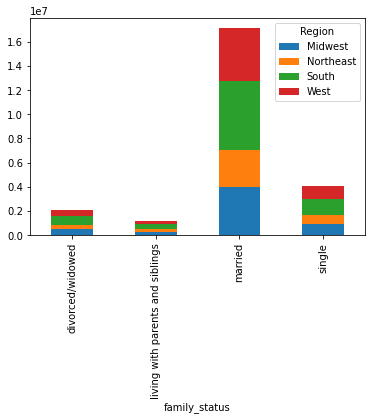

In [49]:
#charting the relation between family status and region
xtb_family_status_region.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='family_status'>

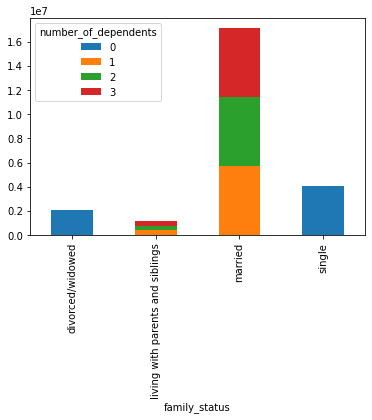

In [50]:
#charting the relation between family status and number of dependent
xtb_family_status_dependent.plot(kind='bar', stacked=True)

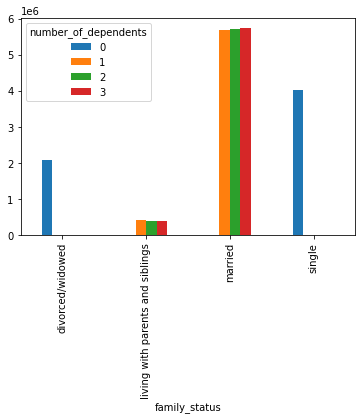

In [51]:
bar_family_dependent = xtb_family_status_dependent.plot(kind = 'bar', stacked = False, width = 0.5)

<AxesSubplot:xlabel='department_id'>

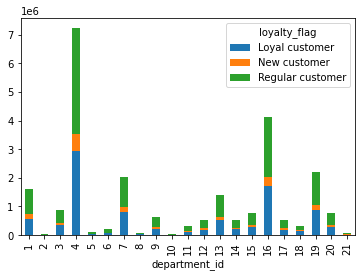

In [52]:
#charting the relation between department_id and loyalty_status
xtb_dept_loyalty.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='department_id'>

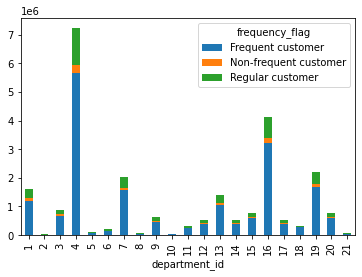

In [53]:
#charting the relation between department_id and frequency_flag
xtb_dept_frequency.plot(kind='bar', stacked=True)

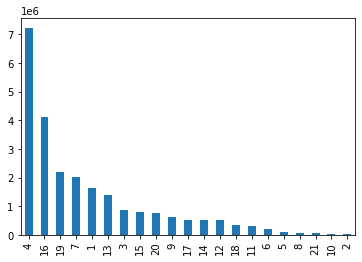

In [54]:
#orders by department
bar_order_dep = df_cleaned['department_id'].value_counts().plot.bar()

## Q7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [55]:
# aggregate user by expenditure
agg_user_prices = df_cleaned.groupby('user_id').agg({'prices': ['mean', 'min', 'max']})

In [56]:
agg_user_prices

prices           
             mean  min   max
user_id                     
1        6.697368  1.3  14.0
2        7.834810  1.3  14.8
3        8.279310  1.3  14.3
4        5.000000  1.4   7.5
7        7.754887  1.1  23.2
...           ...  ...   ...
206203   6.330000  1.8  13.8
206206   7.577737  1.1  14.8
206207   7.712579  1.2  24.7
206208   8.388942  1.1  21.6
206209   7.055263  1.3  14.7

[162631 rows x 3 columns]

In [57]:
# aggregate user by usage frequency
agg_user_DPO = df_cleaned.groupby('user_id').agg({'days_since_prior_order': ['mean', 'min', 'max']})
agg_user_DPO

days_since_prior_order            
                          mean   min   max
user_id                                   
1                    19.842105   0.0  30.0
2                    17.259494   6.0  30.0
3                    10.155172   7.0  17.0
4                     0.000000   0.0   0.0
7                     8.526316   2.0  28.0
...                        ...   ...   ...
206203               30.000000  30.0  30.0
206206                4.083942   0.0  15.0
206207               16.012579   1.0  30.0
206208                7.432859   0.0  20.0
206209               17.881579   3.0  30.0

[162631 rows x 3 columns]

In [58]:
# Aggregate customer frequency by expenditure
agg_frequency_prices= df_cleaned.groupby('frequency_flag').agg({'prices': ['mean', 'min', 'max']})
agg_frequency_prices

prices           
                           mean  min   max
frequency_flag                            
Frequent customer      7.791924  1.0  25.0
Non-frequent customer  7.771731  1.0  25.0
Regular customer       7.790135  1.0  25.0

In [59]:
# Aggregate customer loyalty by expenditure
agg_loyalty_prices= df_cleaned.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})
agg_loyalty_prices

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.774434  1.0  25.0
New customer      7.802461  1.0  25.0
Regular customer  7.800892  1.0  25.0

In [60]:
# Aggregate customer spending habit by expenditure
agg_spender_prices= df_cleaned.groupby('spender_flag').agg({'prices': ['mean', 'min', 'max']})
agg_spender_prices

prices           
                  mean  min   max
spender_flag                     
High spender  8.158752  1.0  25.0
Low spender   7.783305  1.0  25.0

In [61]:
# Aggregate customer gender by expenditure
agg_gender_prices= df_cleaned.groupby('gender').agg({'prices': ['mean', 'min', 'max']})
agg_gender_prices

prices           
            mean  min   max
gender                     
Female  7.789054  1.0  25.0
Male    7.792270  1.0  25.0

In [62]:
# Aggregate customer family status by expenditure
agg_family_prices= df_cleaned.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})
agg_family_prices

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.802878  1.0  25.0
living with parents and siblings  7.800691  1.0  25.0
married                           7.789876  1.0  25.0
single                            7.784801  1.0  25.0

In [63]:
# Aggregate number of dependents by expenditure
agg_dependent_prices= df_cleaned.groupby('number_of_dependents').agg({'prices': ['mean', 'min', 'max']})
agg_dependent_prices

prices           
                          mean  min   max
number_of_dependents                     
0                     7.790987  1.0  25.0
1                     7.793787  1.0  25.0
2                     7.784331  1.0  25.0
3                     7.793571  1.0  25.0

In [64]:
# Aggregate Region by expenditure
agg_region_prices= df_cleaned.groupby('Region').agg({'prices': ['mean', 'min', 'max']})
agg_region_prices

prices           
               mean  min   max
Region                        
Midwest    7.790719  1.0  25.0
Northeast  7.781979  1.0  25.0
South      7.795570  1.0  25.0
West       7.790263  1.0  25.0

## Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## Q9.Produce suitable charts to illustrate your results and export them in your project folder.

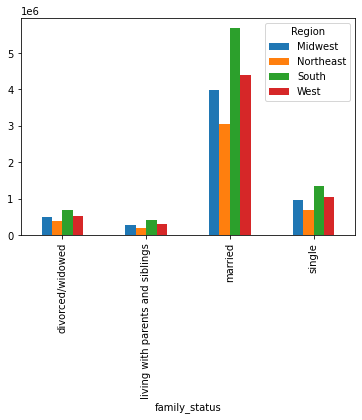

In [65]:
#charting the relation between family status and region
bar_family_region = xtb_family_status_region.plot(kind = 'bar', stacked = False, width = 0.5)

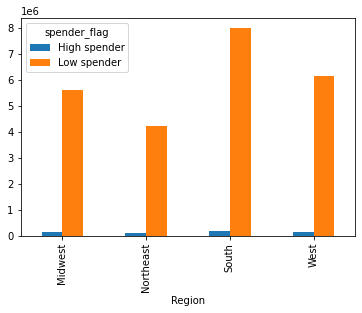

In [66]:
#charting the relation between customer spending habits and region
bar_spender_region = xtb_region_spender_flag.plot(kind = 'bar', stacked = False, width = 0.5)

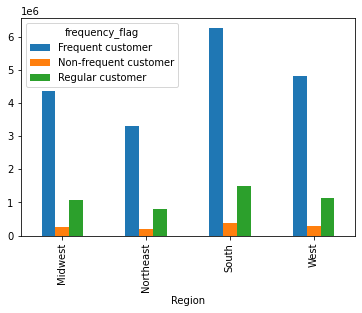

In [67]:
#charting the relation between customer frequency habits and region
bar_frequency_region = xtb_region_frequency_flag.plot(kind = 'bar', stacked = False, width = 0.5)

<AxesSubplot:xlabel='department_id'>

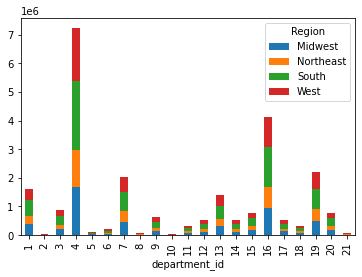

In [68]:
#charting the relation between Region and department_id
xtb_region_dept.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='department_id'>

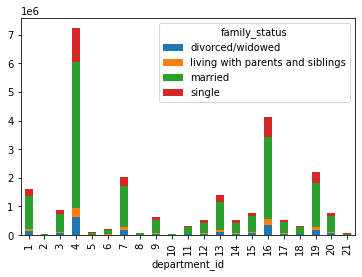

In [69]:
#charting the relation between department_id and family_status
xtb_dept_family_stat.plot(kind='bar', stacked=True)

## Additional Visualization

In [70]:
df_plot =df_cleaned[['orders_day_of_week','mean_price']]

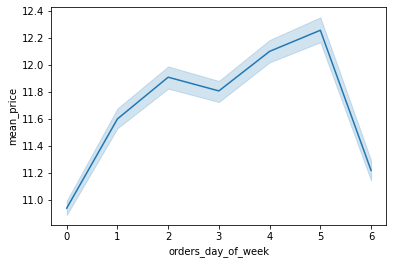

In [71]:
# Creating line plot for Orders and prices
plot_ODW_prices = sns.lineplot(data = df_plot, x = 'orders_day_of_week',y = 'mean_price')

In [72]:
df_plot_d =df_cleaned[['order_hour_of_day','mean_price']]

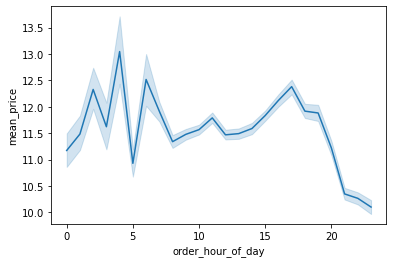

In [73]:
# Creating line plot for Orders and prices
plot_OHD_prices = sns.lineplot(data = df_plot_d, x = 'order_hour_of_day',y = 'mean_price')

In [74]:
# Using value_counts to prep for a product_range pie chart
price_range_counts = df_cleaned['price_range_loc'].value_counts()
price_range_counts

Mid-range product     16479445
Low-range product      7626745
High-range product      304976
Name: price_range_loc, dtype: int64

In [75]:
labels = 'Mid-range products', 'Low-range products', 'High-range products'
sizes = price_range_counts
explode = (0, 0, 0.3)

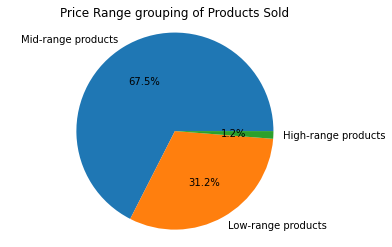

In [76]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Price Range grouping of Products Sold')

plt.show()

In [77]:
# Using value_counts for brand loyalty
frequency_counts = df_cleaned['frequency_flag'].value_counts()
frequency_counts

Frequent customer        18762178
Regular customer          4538113
Non-frequent customer     1110875
Name: frequency_flag, dtype: int64

In [78]:
labels = 'Frequent customer', 'Regular customer', 'Non-frequent customer'
sizes = frequency_counts
explode = (0, 0, 0.3)

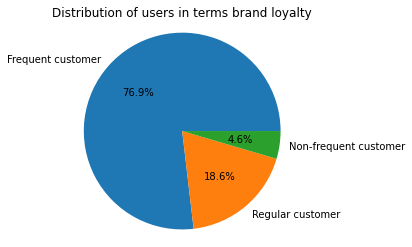

In [79]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Distribution of users in terms brand loyalty')

plt.show()

In [80]:
# Aggregate Region by expenditure
df_cleaned.groupby('Region').agg({'age': ['mean', 'min', 'max']})

age        
                mean min max
Region                      
Midwest    49.419674  18  81
Northeast  49.607294  18  81
South      49.304344  18  81
West       49.587194  18  81

In [81]:
# creating different ranges for age
df_cleaned.loc[df_cleaned['age'] < 20, 'age_range'] = '18-19'
df_cleaned.loc[(df_cleaned['age'] >= 20) & (df_cleaned['age'] < 30), 'age_range'] = '20s'
df_cleaned.loc[(df_cleaned['age'] >= 30) & (df_cleaned['age'] < 40), 'age_range'] = '30s'
df_cleaned.loc[(df_cleaned['age'] >= 40) & (df_cleaned['age'] < 50), 'age_range'] = '40s'
df_cleaned.loc[(df_cleaned['age'] >= 50) & (df_cleaned['age'] < 60), 'age_range'] = '50s'
df_cleaned.loc[(df_cleaned['age'] >= 60) & (df_cleaned['age'] < 70), 'age_range'] = '60s'
df_cleaned.loc[(df_cleaned['age'] >= 70) & (df_cleaned['age'] < 80), 'age_range'] = '70s'
df_cleaned.loc[df_cleaned['age'] >= 80, 'age_range'] = '80 and up'

In [82]:
df_cleaned['age_range'].value_counts()

40s          3851865
30s          3828191
20s          3820794
50s          3812280
70s          3806099
60s          3750933
80 and up     772317
18-19         768687
Name: age_range, dtype: int64

In [83]:
# Crosstab for age and region
xtb_age_reg = pd.crosstab(df_cleaned['age_range'], df_cleaned['Region'], dropna = False)

<AxesSubplot:xlabel='age_range'>

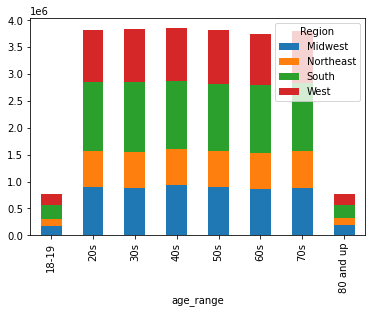

In [84]:
#charting the relation between Region and age
xtb_age_reg.plot(kind='bar', stacked=True)

In [85]:
# Crosstab for age and department_id
xtb_age_dept = pd.crosstab(df_cleaned['department_id'], df_cleaned['age_range'], dropna = False)

<AxesSubplot:xlabel='department_id'>

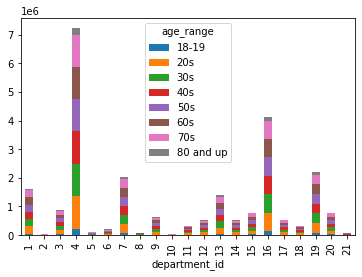

In [86]:
#charting the relation between age and department_id
xtb_age_dept.plot(kind='bar', stacked=True)

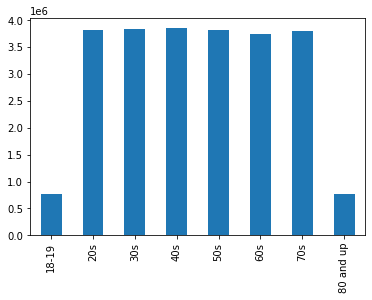

In [87]:
bar_age_range = df_cleaned['age_range'].value_counts().sort_index().plot.bar()
bar_age_range.set_xlabel("days of the week")
bar_age_range.set_ylabel("Cumulative orders in millions")
bar_age_range.set_title("Busiest Days of the Week")

In [88]:
# Crosstab for age and family_status
xtb_age_family_stat = pd.crosstab(df_cleaned['age_range'], df_cleaned['family_status'], dropna = False)

<AxesSubplot:xlabel='age_range'>

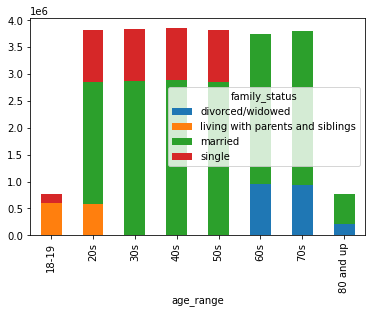

In [89]:
#charting the relation between age and family_status
xtb_age_family_stat.plot(kind='bar', stacked=True)

In [90]:
# age/frequency_flag
xtb_age_freq = pd.crosstab(df_cleaned['age_range'], df_cleaned['frequency_flag'], dropna = False)

<AxesSubplot:xlabel='age_range'>

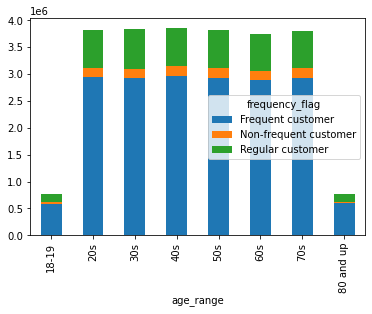

In [91]:
#charting the relation between age and frequency_flag
xtb_age_freq.plot(kind='bar', stacked=True)

In [92]:
# department/frequency_flag
xtb_dep_freq = pd.crosstab(df_cleaned['department_id'], df_cleaned['frequency_flag'], dropna = False)

<AxesSubplot:xlabel='department_id'>

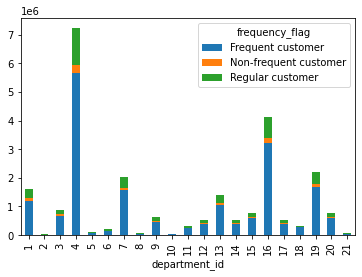

In [93]:
#charting the relation between department_id and frequency_flag
xtb_dep_freq.plot(kind='bar', stacked=True)

In [94]:
# price_range/family_status
xtb_dep_price_range2 = pd.crosstab(df_cleaned['price_range_loc'], df_cleaned['family_status'], dropna = False)

<AxesSubplot:xlabel='price_range_loc'>

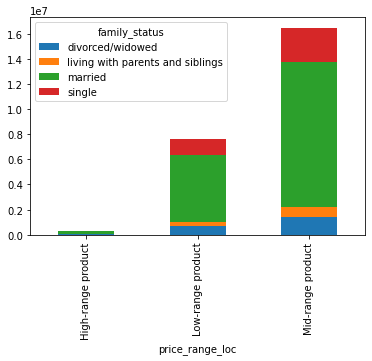

In [95]:
#charting the relation between department_id and price_range_loc
xtb_dep_price_range2.plot(kind='bar', stacked=True)

In [115]:
# Creating weekday column with loc function 

df_cleaned.loc[df_cleaned['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
df_cleaned.loc[df_cleaned['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
df_cleaned.loc[df_cleaned['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
df_cleaned.loc[df_cleaned['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
df_cleaned.loc[df_cleaned['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
df_cleaned.loc[df_cleaned['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
df_cleaned.loc[df_cleaned['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

Text(0.5, 1.0, 'Busiest Days of the Week')

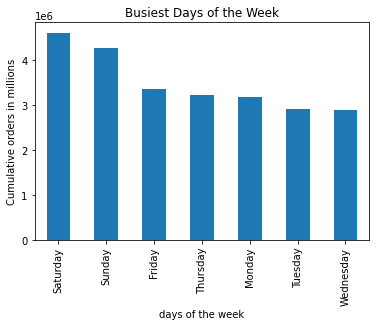

In [118]:
# Adding details to visualization
bar_ords_day = df_cleaned['weekday'].value_counts().plot.bar()
bar_ords_day.set_xlabel("days of the week")
bar_ords_day.set_ylabel("Cumulative orders in millions")
bar_ords_day.set_title("Busiest Days of the Week")

Text(0.5, 1.0, 'Busiest Hours of the Day')

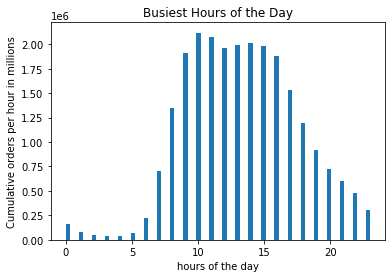

In [99]:
# histogram of the “order_hour_of_day” column
bar_2 = df_cleaned['order_hour_of_day'].plot.hist(bins = 70)
bar_2.set_xlabel("hours of the day")
bar_2.set_ylabel("Cumulative orders per hour in millions")
bar_2.set_title("Busiest Hours of the Day")

In [100]:
# Creating department columns with name instead of numbers
df_cleaned.loc[df_cleaned['department_id'] == 1, 'department'] = 'frozen'
df_cleaned.loc[df_cleaned['department_id'] == 2, 'department'] = 'other'
df_cleaned.loc[df_cleaned['department_id'] == 3, 'department'] = 'bakery'
df_cleaned.loc[df_cleaned['department_id'] == 4, 'department'] = 'produce'
df_cleaned.loc[df_cleaned['department_id'] == 5, 'department'] = 'alcohol'
df_cleaned.loc[df_cleaned['department_id'] == 6, 'department'] = 'international'
df_cleaned.loc[df_cleaned['department_id'] == 7, 'department'] = 'beverages'
df_cleaned.loc[df_cleaned['department_id'] == 8, 'department'] = 'pets'
df_cleaned.loc[df_cleaned['department_id'] == 9, 'department'] = 'dry goods pasta'
df_cleaned.loc[df_cleaned['department_id'] == 10, 'department'] = 'bulk'
df_cleaned.loc[df_cleaned['department_id'] == 11, 'department'] = 'personal care'
df_cleaned.loc[df_cleaned['department_id'] == 12, 'department'] = 'meat seafood'
df_cleaned.loc[df_cleaned['department_id'] == 13, 'department'] = 'pantry'
df_cleaned.loc[df_cleaned['department_id'] == 14, 'department'] = 'breakfast'
df_cleaned.loc[df_cleaned['department_id'] == 15, 'department'] = 'canned goods'
df_cleaned.loc[df_cleaned['department_id'] == 16, 'department'] = 'dairy eggs'
df_cleaned.loc[df_cleaned['department_id'] == 17, 'department'] = 'households'
df_cleaned.loc[df_cleaned['department_id'] == 18, 'department'] = 'babies'
df_cleaned.loc[df_cleaned['department_id'] == 19, 'department'] = 'snacks'
df_cleaned.loc[df_cleaned['department_id'] == 20, 'department'] = 'deli'
df_cleaned.loc[df_cleaned['department_id'] == 21, 'department'] = 'missing'

Text(0.5, 1.0, 'Cumulative Orders by Department')

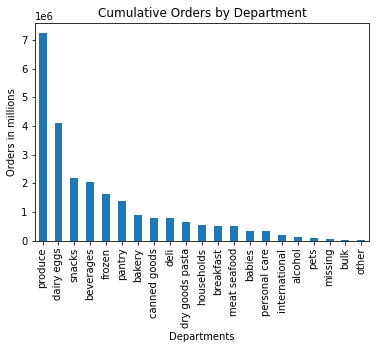

In [120]:
bar_order_dep_new = df_cleaned['department'].value_counts().plot.bar()
bar_order_dep_new.set_xlabel("Departments")
bar_order_dep_new.set_ylabel("Orders in millions")
bar_order_dep_new.set_title("Cumulative Orders by Department")

## Q10. Tidy up your script, export your final data set, and save your notebook.

In [96]:
# EXPORTING DATA
df_cleaned.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_cleaned_final.pkl'))